In [84]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# some imports to set up plotting 
import matplotlib.pyplot as plt
import seaborn as sns

Analyzing a dataset on the churn rate of telecom operator clients.
--

``Note`` : this dataset is ``different`` from the Telco_Churn_1 and Telco_Churn_2, used in ``earlier Assignments``

In [85]:
# load the dataset and view first 5 rows
df = pd.read_csv('C:\Program Files/Python36/suven/Data Anaylsis/Dataset/telecom_churn_dataset.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [86]:
# data dimensionality, feature names, and feature types
print(df.shape)
print("-----------------------------")
print(df.columns)
print("-----------------------------")
df.info()

# https://www.geeksforgeeks.org/python-pandas-dataframe-info/

(3333, 20)
-----------------------------
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 no

We see that one feature is ``logical (bool)``, ``3 features are of type object``, and ``16 features are numeric``. There are ``no null or NaN`` because each column contains 3333 observations, the same number of rows we saw before with shape.

Let's change the column type of ``Churn feature`` to ``int64``:

In [87]:
# converting datatype of Churn from bool to int64
df['Churn'] = df['Churn'].astype('int64')
df['Churn'].dtype

dtype('int64')

The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [88]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [89]:
# In order to see statistics on non-numerical features, 
# one has to explicitly indicate data types of interest 
# in the include parameter.

df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


For categorical (type object) and boolean (type bool) features we can use the value_counts method. Let’s have a look at the distribution of Churn:

In [90]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 users out of 3333 are loyal; their Churn value is 0. To calculate fractions, pass **normalize=True** to the value_counts function.

In [91]:
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

**Sorting**

> A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by Total day charge (use ascending=False to sort in descending order):

In [92]:
df.sort_values(by='Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [93]:
# We can also sort by multiple columns:

df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


Questions  -- start from here -- :
--

In [94]:
# Q1 > what is the proportion of churned users in our dataframe?

df['Churn'].mean()

# ans + observation  : 14.5% is actually quite bad for a compand

0.14491449144914492

In [95]:
# Q2 > What are average values of all numerical features for churned users? 
# Hint : df[df['Churn'] == 1] would give all churned customer rows

df[df['Churn'] == 1].mean()


Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [96]:
# Q3 >How much time (on average) do churned users spend on the phone during daytime?

df[df['Churn'] == 1]['Total day minutes'].mean()



206.91407867494823

In [97]:
# Q4 > What is the maximum length of international calls among loyal users 
# (Churn == 0) who do not have an international plan?


df[(df['Churn'] == 0) & (df['International plan']=='No')]['Total intl minutes'].max()

18.9

**Important**

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The ``loc`` method is used for indexing by name, while ``iloc()`` is used for indexing by number.

In the first case below, we say "give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)". In the second case, we say "give us the values of the first five rows in the first three columns" (as in a typical Python slice: the maximal value is not included).

In [98]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [99]:
df.iloc[0:-1, 0:2]

,State,Account length
0,KS,128
1,OH,107
2,NJ,137
3,OH,84
4,OK,75
...,...,...
3327,SC,79
3328,AZ,192
3329,WV,68
3330,RI,28


In [100]:
# If we need the first or the last line of the data frame, 
# we can use the df[:1] or df[-1:] construct:

df[:1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


**Applying Functions to Cells, Columns and Rows**

To apply functions to each column, use ``apply()`` :

In [101]:
# for e.g. try this :
df.apply(np.max)  # would find max value for each column

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [102]:
# Q5 > select all states starting with W.  
# Hint : use Lambda functions
# https://stackoverflow.com/questions/34962104/pandas-how-can-i-use-the-apply-function-for-a-single-column

df[df['State'].apply(lambda state:  state[0]=='W')].head()



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


In [103]:
# The map method can be used to replace values in a column 
# by passing a dictionary of the form {old_value: new_value} as its argument:

# Q6 > For the "International plan" column replace 'No' -> False and 'Yes' -> True

d = {'No' : False, 'Yes' : True}

df['International plan']=df['International plan'].map(d)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [104]:
# The same thing as for map(), can be done with the replace method also.

# Q7 > Use replace() and replace 'No' -> False and 'Yes' -> True 
#      for "Voice mail plan" column
# Reference : https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value
# df['Voice mail plan']=df['Voice mail plan'].map(d)
df['Voice mail plan'].replace(to_replace=['No'], value='False',inplace=True)
df['Voice mail plan'].replace(to_replace=['Yes'], value='True',inplace=True)
# df
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Grouping**

In general, grouping data in Pandas works as follows:

> df.groupby(by=grouping_columns)[columns_to_show].function()

First, the groupby method divides the ``grouping_columns`` by their values. They become a new index in the resulting dataframe.

Then, columns of interest are selected ``(columns_to_show)``. If columns_to_show is not included, all non groupby clauses will be included.

Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the Churn variable and display statistics of three columns in each group:

In [21]:
# example : group the data according to the values of the Churn variable 
# and display statistics of three columns in each group:

columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

# percentiles=[] supresses calculation of 25%ile and 75%ile

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

In [105]:
# Let’s do the same thing, but slightly differently 
# by passing a list of functions to agg():

columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min,np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

**Summary tables**

Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a ``contingency table`` using the ``crosstab method``:

In [110]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [108]:
# Q8 > plot a contigency table using crosstab() of 'churn'  vs. 'Voice mail plan'
# add an attribute normalize=True to crosstab().  

pd.crosstab(df['Churn'], df['Voice mail plan'],normalize=True)



Voice mail plan,False,True
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


**We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).**
But people who are leaving  planing to leave my company that is churn = 1 are using international plans which tells us that our 
international plan management isnt good
> This will resemble pivot tables to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the **pivot_table** method takes the following parameters:

**values** – a list of variables to calculate statistics for,

**index** – a list of variables to group data by,

**aggfunc** – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

**Let’s take a look at the average number of day, evening, and night calls by area code:**

In [111]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


**DataFrame transformations**

Like many other things in Pandas, adding columns to a DataFrame is very much possible.

Calculate the total number of calls for all users, let’s create the total_calls Series and paste it into the DataFrame. 

In [116]:
# Q 9 > Calculate the total number of calls for all users.
# Hint 1 : total_calls = Total day calls + Total eve calls + Total night calls + Total intl calls
# Hint 2 : df['total_calls'] is the new column

df['total_calls'] = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


To **delete columns or rows**, use the ``drop`` method, passing the required indexes and the axis parameter (1 if you delete columns, and nothing or 0 if you delete rows). The ``inplace`` argument tells whether to change the original DataFrame. With **inplace=False**, the drop method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With **inplace=True**, it alters the DataFrame.

In [114]:
# Q 10 > Get rid of just created column namely 'total calls'

df.drop(['total_calls'],axis=1, inplace = True)
df.head()


# for example :
# and here’s how you can delete rows
# df.drop([1, 2]).head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


International plan  False  True   All
Churn                                
0                    2664   186  2850
1                     346   137   483
All                  3010   323  3333


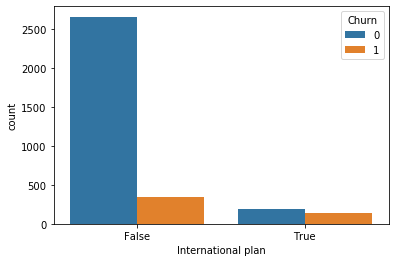

In [122]:
# Q 11_A >  plot a contigency table using crosstab() of 'churn'  vs. 'International plan' 
# add an attribute margins=True to crosstab()  -> this would give you 
#                                            row-wise and column-wise total 


print(pd.crosstab(df['Churn'], df['International plan'],margins=True))



# Q 11_B > Plot a vertical bar graph showing count of customers 
# using 'International Plan' under both the churn categories. 
# ( Hint : use sns.countplot function )


sns.countplot(x='International plan',hue='Churn',data=df)

``Observation`` : We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

In [123]:
# 12_A > plot a contigency table using crosstab() of 'churn'  vs. 'Customer service calls' 
# add an attribute margins=True to crosstab(). 
pd.crosstab(df['Churn'], df['Customer service calls'],margins=True)


Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<function matplotlib.pyplot.show(*args, **kw)>

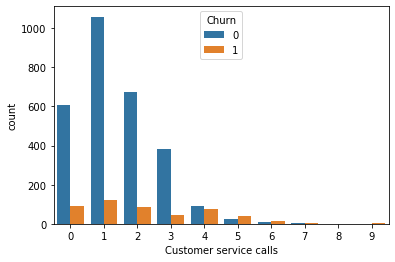

In [126]:
# Q 12_B > Plot a vertical bar graph showing count of customers 
# using 'Customer service calls' under both the churn categories. 
sns.countplot(x='Customer service calls',hue='Churn',data=df)
plt.show()

``Observation`` : Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

**Add a binary feature to our DataFrame** – ``Customer service calls > 3``. 
And once again, let's see how it relates to churn.

In [132]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


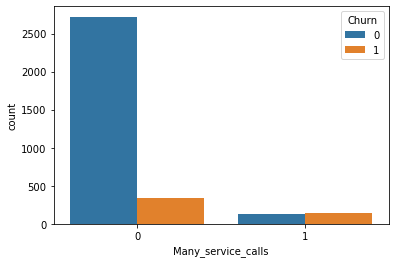

In [133]:
# plot 'Many_service_calls'  vs. 'Churn'

sns.countplot(x='Many_service_calls', hue='Churn', data=df);

In [134]:
# Q 13> Construct another contingency table that relates Churn 
# with both International plan and freshly created Many_service_calls.

pd.crosstab(df['Many_service_calls'] & df['International plan'],df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


**``Conclusion``** : 

Therefore, predicting that a customer is not loyal (Churn=1) in the case when the number of calls to the service center is greater than 3 and the International Plan is added (and predicting Churn=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got through this very simple reasoning, serves as a good starting point (baseline) for the further machine learning models that we will build.

As we move on in this course, recall that, before the advent of machine learning, the data analysis process looked something like this. 

**Let's recap what we've learned through this assignment:**
The share of loyal clients in the sample is 85.5%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (accuracy) of subsequent models should be no less than this number, and will hopefully be significantly higher; With the help of a simple forecast that can be expressed by the following formula: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of 85.8%, which is just above 85.5%. 